# **Project1**: No Show Appointment Dataset

## Introduction

>**Data Description & Research Questions**

>I will be using pandas package and matplotlib.
The data set used is the Now Show Appointment Dataset, you can download it from this link 
https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv
Our dataset for this analysis is from a hospital record which shows several variables including whether or not a patient showed up for their hospital appoinment. Our focus is to observe how the several factors interact and result to a patient absent or present for appointment. The data set cotains 14 columns however, we identified 7 research questions as listed below and only 5 columns **(Gender, Age, Scholarship, SMS_Recieve, Noshow)** will be useful to answer the research questions hence the remaining have been drop.

>We will be exploring **7 research questions**. The questions are as follow: <br>
**Question 1** - Does Patient Age Affect whether they show up for their appointment or Not? <br>
**Question 2** - Does having Health Insurance affect why Patient show up for their appointment or not? <br> 
**Question 3** - Does the Gender of the Patient Affect why they show up or not for their appointment? <br>
**Question 4** - Does Receiving SMS affect why patient show up or not for their appointment? <br> 
**Question 5** - How does Scholarship and Gender affect why patient show up or not for their appointment? <br>
**Question 6** - How does SMS Received and Gender affect why patient show up or not for their appointment? <br>
**Question 7** - How does Scholarship and SMS Received affect why patient show up or not for their appointment?

## Data Wrangling

In [1]:
#import packages
#load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_NSA= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [2]:
#display the dataset
df_NSA.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#size of the dataset
df_NSA.shape

(110527, 14)

In [4]:
#descriptive statistics of each column
df_NSA.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#datatypes of the column
df_NSA.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#summary of the data set
df_NSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#drop column in the datset that wont be used
df_NSA.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Hipertension','Diabetes','Alcoholism','Handcap','Neighbourhood'],axis=1,inplace=True)


In [8]:
#rename the column No-show
df_NSA.rename(columns={"No-show": "Noshow"},inplace=True)


In [9]:
df_NSA.head()

,Gender,Age,Scholarship,SMS_received,Noshow
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,0,No


In [10]:
#convert the column no show to int 
def convert_noShow(df_NSA):
    if df_NSA['Noshow'] == 'No':
        return 1
    return 0
df_NSA['Numshow'] = df_NSA.apply(lambda x : convert_noShow(x),axis = 1)


In [11]:
df_NSA.head()

,Gender,Age,Scholarship,SMS_received,Noshow,Numshow
0,F,62,0,0,No,1
1,M,56,0,0,No,1
2,F,62,0,0,No,1
3,F,8,0,0,No,1
4,F,56,0,0,No,1


In [12]:
df_NSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110527 non-null  object
 1   Age           110527 non-null  int64 
 2   Scholarship   110527 non-null  int64 
 3   SMS_received  110527 non-null  int64 
 4   Noshow        110527 non-null  object
 5   Numshow       110527 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.1+ MB


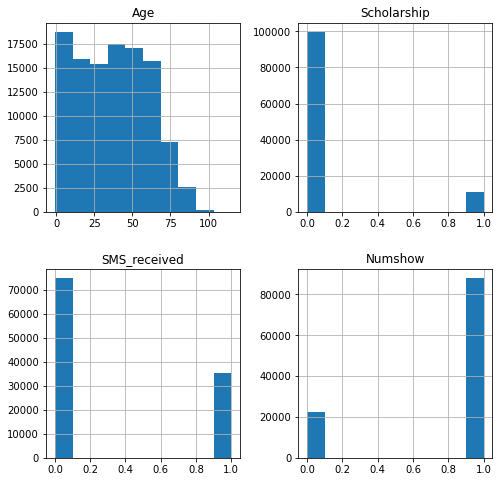

In [13]:
df_NSA.hist(figsize=(8,8));

> During the **Data Wrangling Stage**, the information of the data set was checked to know if they is any null value and none was found. We also checked the data types of each column. The No-show column was renamed to Noshow and a function was created to change the type to integer and store it in a new column named Numshow.

>9 column was dropped and we were left with 5 columns which is significant in solving our research questions

# EXPLORATORY ANALYSIS

In [14]:
#Num show is dependent variable and the rest are independent
#mask for rows if the patient showed up or not

show=df_NSA.Numshow == True
noshow=df_NSA.Numshow == False

In [15]:
#mean of the age of does who showed up, the mean is higher than does who didnt
df_NSA.Age[show].mean()

37.790064393252315

In [16]:
#mean of the age of does who didnt show up, it is lower than does who showed up
df_NSA.Age[noshow].mean()

34.31766656212196

### Generic Function for displaying Chart using mask

In [17]:
def show_chart(data, mask1, mask2, color1, color2, label1, label2, title, xlabel, ylabel):
    data[mask1].hist(alpha=0.5, bins=15, color=color1,label=label1)
    data[mask2].hist(alpha=0.5, bins=15, color=color2,label=label2)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Q1- Does Patient Age Affect whether they show up for their appointment or Not?

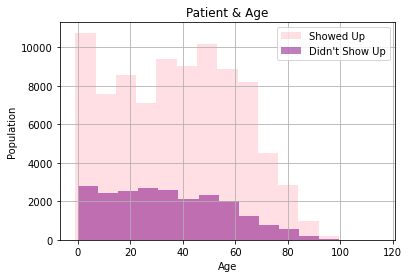

In [18]:
#visualized the age based on does who showed up or not.
#the younger age group show up more 



show_chart(df_NSA.Age, show, noshow, 'pink', 'purple', 'Showed Up', 'Didn\'t Show Up', 'Patient & Age','Age', 'Population')
    
# df_NSA.Age[show].hist(alpha=0.5, bins=15, color='pink',label='Showed Up')
# df_NSA.Age[noshow].hist(alpha=0.5, bins=15,color='purple', label='Didnt Show Up')
# plt.legend();
# plt.title('Patient and Age')
# plt.xlabel('Age')
# plt.ylabel('Population')


>Distribution of Patient who showed up for their appointment based on their ages, a histogram was used to visualize the distribution.
It Shows that the younger patient showed up for their appointment than the Older Patient. This visualization helps us know if the patients age affect why they show up or not

### Q2- Does having Health Insurance affect why Patient show up for their appointment or not?

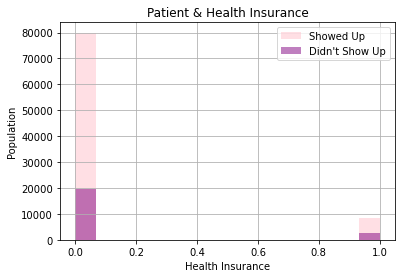

In [19]:
#groupby Scholarship
#does without scholarship showed up more than does with scholarship
##df_NSA.groupby('Scholarship').Numshow.mean().plot(kind= 'bar');
#distiribution of patient based on their health Insurance to know who showed up more
# df_NSA.Scholarship[show].hist(alpha=0.5, bins=15, color='pink',label='Showed Up')
# df_NSA.Scholarship[noshow].hist(alpha=0.5, bins=15,color='purple', label='Didnt Show Up')
# plt.legend();
# plt.title('Health Insurance and Patient')
# #titling x axis
# plt.xlabel('Health Insurance')
# plt.ylabel('Population');


show_chart(df_NSA.Scholarship, show, noshow, 'pink', 'purple', 'Showed Up', 'Didn\'t Show Up', 'Patient & Health Insurance','Health Insurance', 'Population')
    

> Distribution of Patient who showed up for their appointment based on their Health Insurance, a histogram was used to visualize the distribution.
It Shows that Patient without health insurance showed up than those without health insurance. This visualization helps us know if the patients status of health insurance affect why they show up or not,from this we can say it does not affect why they show up or not for their appointment

### Q3- Does the Gender of the Patient Affect why they show up or not for their appointment?

F    71840
M    38687
Name: Gender, dtype: int64

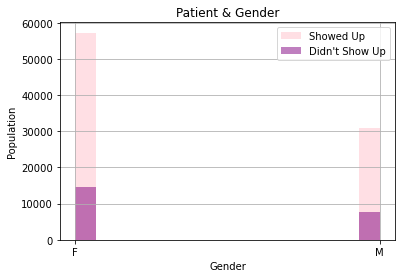

In [20]:
#distiribution of patient based on their gender to know who showed up more
# df_NSA.Gender[show].hist(alpha=0.5, bins=15, color='pink', label='Showed Up')
# df_NSA.Gender[noshow].hist(alpha=0.5, bins=15, color='purple', label='Didnt Show Up')
# plt.legend();
# plt.title('Gender and Patient')
# plt.xlabel('Gender')
# plt.ylabel('Population')

show_chart(df_NSA.Gender, show, noshow, 'pink', 'purple', 'Showed Up', 'Didn\'t Show Up', 'Patient & Gender','Gender', 'Population')
    
df_NSA.Gender.value_counts()

> Distribution of Patient who showed up for their appointment based on their Gender, a histogram was used to visualize the distribution.
It Shows that Female Patient showed up than the male patient. Though the number of female patient are more than the male patient.
This visualization helps us know that female patient showed up more than the male patient 

### Q4- Does Receiving SMS affect why patient show up or not for their appointment?

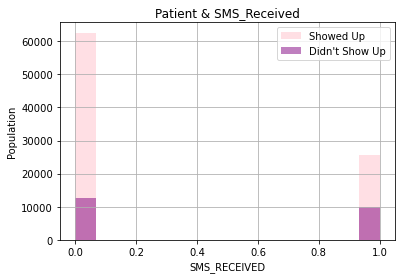

In [21]:
# df_NSA.SMS_received[show].value_counts().plot(kind='bar',alpha=0.5,color='pink',label='Showed up')
# df_NSA.SMS_received[noshow].value_counts().plot(kind='bar',alpha=0.5, color= 'purple', label='Didnt Show Up')
# plt.legend();
# plt.title('SMS Received and Patient')
# plt.xlabel('Recieved SMS')
# plt.ylabel('Population');

show_chart(df_NSA.SMS_received, show, noshow, 'pink', 'purple', 'Showed Up', 'Didn\'t Show Up', 'Patient & SMS_Received','SMS_RECEIVED', 'Population')
    


> Distribution of Patient who showed up for their appointment based on them receiving SMS, a bar chart was used to visualize the distribution.
It Shows that Patient who did not receive sms showed up for their appointment than the patient who recieved sms. we can say not receiving sms is not the reason why the patients are not showing up

### Q5- How does Scholarship and Gender affect why patient show up or not for their appointment?

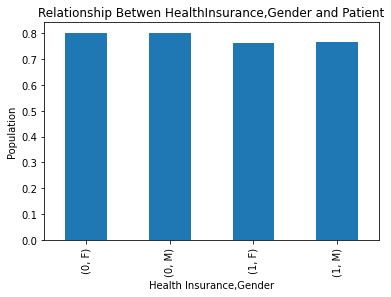

In [22]:
#no strong relationship between gender,scholarship and the number of patient showing up


df_NSA.groupby(['Scholarship', 'Gender']).Numshow.mean().plot(kind='bar');

plt.title('Relationship Betwen HealthInsurance,Gender and Patient')
plt.xlabel('Health Insurance,Gender')
plt.ylabel('Population');


> Gender and Health Insurance was grouped together to help us check if the two factor affects the number of Patient who showed up for their appointment or do not show up for their appointment. We explored the grouped data by checking if it affects the mean  number of patient who showed up for their appointmentS or not, we can see from the bar chart that it does not have an effect on why the patient showed up for their appoinment or otherwise.

### Q6- How does SMS Received and Gender affect why patient show up or not for their appointment?

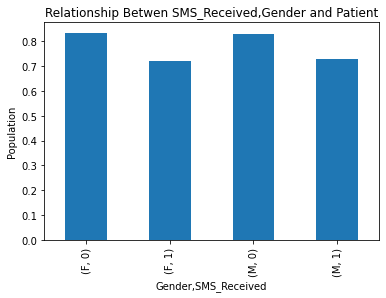

In [23]:
df_NSA.groupby([ 'Gender','SMS_received']).Numshow.mean().plot(kind='bar');

plt.title('Relationship Betwen SMS_Received,Gender and Patient')
plt.xlabel('Gender,SMS_Received') 
plt.ylabel('Population');

> Gender and SMS Recevied was grouped together to help us check if the two factor affects the number of Patient who showed up for their appointment or do not show up for their appointment,from the bar chart used for visulaization it shows that more patients who did not receive SMS showed up for their appointment irrespective of their gender.

### Q7- How does Scholarship and SMS Received affect why patient show up or not for their appointment?

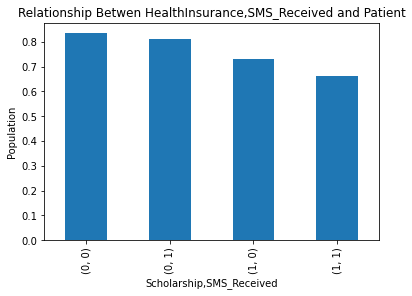

In [24]:

df_NSA.groupby([ 'SMS_received','Scholarship']).Numshow.mean().plot(kind='bar');

plt.title('Relationship Betwen HealthInsurance,SMS_Received and Patient')
plt.xlabel('Scholarship,SMS_Received')
plt.ylabel('Population');

> SMS Received and Scholarship was grouped together to help us check the relationship. it is clear that more patients who did not receive SMS showed up for their appointment and health insurance does not affect whether they  show up or not.

<a id='conclusions'></a>
## Conclusions

> **Results:**, We observed the following from our dataset <br> 
>1. It Shows that the younger patient generally showed up for their appointment than the older patient
>2. The health insurance factor does not affect patients presents or absents during appointment
>3. It is clear that female patients showed up more for their appointment than male patients
>4. No relationship between patient receiving sms and showing up
>5. Irrespective of Gender, having health insurance does not shange why patient are absent or present
>6. Patient who didnt not receive sms showed up more than does who received sms irrespective of their gender
>7. Health Insurance has no effect on effect on why patient are prensent or absent and does who didnt receive sms showed up more.


> **Limitation:**, Our observed limitation includes <br> 
>1. Patient Noshow column has to be converted to int because it was an object 
>2. Ages of the Patient needs to be categorized 

>In general,grouping by 3 factors will make the result more difficult to differentiate the relationship, as using one factor shows better understanding of the dataset than that of the two factors relationship.
 

<div class="alert alert-block alert-success">
<b>Finally:</b> We were able to explore 7 research questions <br> 

</div>



## References
> [1] ‘pandas documentation — pandas 1.4.2 documentation’. https://pandas.pydata.org/pandas-docs/stable/index.html (accessed May 28, 2022). <br>[2] W. McKinney, Python for data analysis: data wrangling with pandas, NumPy, and IPython, Second edition. Sebastopol, California: O’Reilly Media, Inc, 2018. <br> [3] ‘IBM Docs’, Apr. 08, 2021. https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet (accessed May 29, 2022).